In [ ]:
pip install tensorflow

In [1]:

import matplotlib.pyplot as plt
import numpy as np

import deepxde as dde
from deepxde.backend import tf



Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



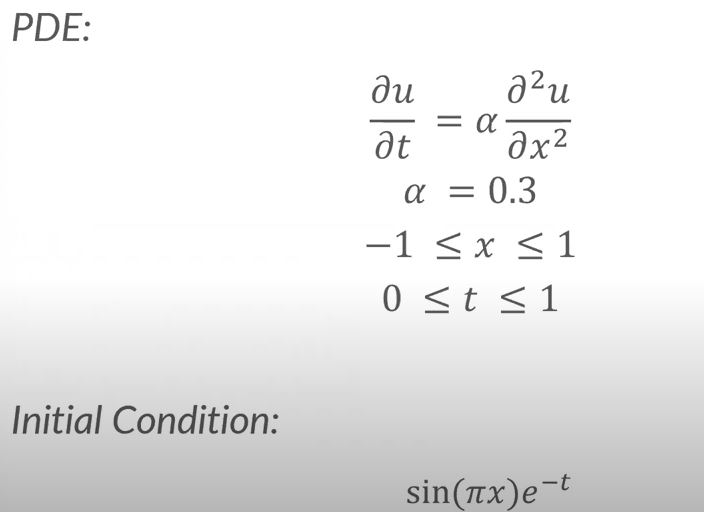

In [2]:
#DOMAIN DATA

gom=dde.geometry.Interval(-1,1)
timedomain=dde.geometry.TimeDomain(0,1)
geomtime=dde.geometry.GeometryXTime(gom,timedomain)

In [3]:
##PDE
def pde(x,y):
    dy_t=dde.grad.jacobian(y,x,j=1)
    dy_xx=dde.grad.hessian(y,x,j=0)
    return (dy_t-dy_xx*0.3)

In [4]:
###conditionals
def func(x):
     return np.sin(np.pi*x[:,0:1])*np.exp(-x[:,1:])


In [5]:
bc=dde.DirichletBC(geomtime,func,lambda _,on_boundary:on_boundary)
ic=dde.IC(geomtime,func,lambda _,on_intial:on_intial)

In [6]:
data=dde.data.TimePDE(geomtime,pde,[bc,ic],num_domain=4000,num_boundary=2000,num_initial=1000,solution=func,num_test=1000)

In [7]:
intializer='Glorot uniform'
optimizer='adam'

In [8]:
layer_size=[2]+[32]*3+[1]
activation='tanh'
net=dde.maps.FNN(layer_size,activation,intializer)

In [9]:
#compile the model

net = dde.maps.FNN(layer_size,activation,intializer)
model=dde.Model(data,net)
model.compile('adam',lr=0.001,metrics=['l2 relative error'])

Compiling model...
Building feed-forward neural network...
'build' took 0.085768 s



C:\Users\Akash\anaconda3\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.551530 s



In [10]:
#train model
losshistory,train_state = model.train(epochs=10000)

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric   
0         [2.20e-02, 1.81e-02, 5.73e-01]    [2.46e-02, 1.81e-02, 5.73e-01]    [1.11e+00]    
1000      [8.47e-04, 9.25e-04, 4.06e-04]    [6.36e-04, 9.25e-04, 4.06e-04]    [2.84e-01]    
2000      [1.71e-04, 2.42e-05, 2.57e-05]    [1.68e-04, 2.42e-05, 2.57e-05]    [2.82e-01]    
3000      [7.19e-05, 7.51e-06, 9.90e-06]    [7.38e-05, 7.51e-06, 9.90e-06]    [2.82e-01]    
4000      [4.35e-05, 5.57e-06, 5.76e-06]    [4.57e-05, 5.57e-06, 5.76e-06]    [2.81e-01]    
5000      [2.59e-05, 1.27e-06, 2.53e-06]    [2.93e-05, 1.27e-06, 2.53e-06]    [2.81e-01]    
6000      [2.06e-05, 1.15e-06, 1.71e-06]    [2.31e-05, 1.15e-06, 1.71e-06]    [2.81e-01]    
7000      [2.62e-05, 6.45e-06, 3.35e-06]    [2.38e-05, 6.45e-06, 3.35e-06]    [2.81e-01]    
8000      [1.36e-05, 2.42e-07, 7.19e-07]    [1.54e-05, 2.42e-07, 7.19e-07]    [2.81e-01]    
9000      [1.18e-05, 2.36

In [11]:
###getting output
x_data=np.linspace(-1,1,num=100)
t_data=np.linspace(0,1,num=100)
test_x,test_t = np.meshgrid(x_data,t_data)


In [12]:
test_domain=np.vstack((np.ravel(test_x),np.ravel(test_t))).T

In [13]:
predicted_solution=model.predict(test_domain)

In [14]:
residual=model.predict(test_domain,operator=pde)

In [15]:
residual = residual.reshape(100, 100)###error

In [16]:
predicted_solution = predicted_solution.reshape(100, 100)###prediction

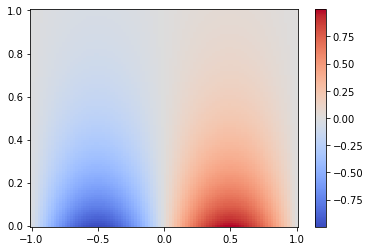

In [17]:
plt.pcolor(test_x, test_t, predicted_solution,cmap='coolwarm')
plt.colorbar()
plt.show()

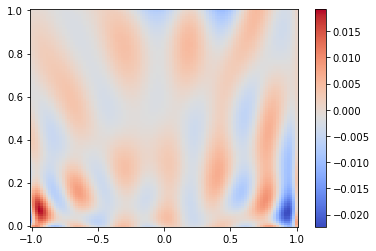

In [18]:
plt.pcolor(test_x, test_t, residual,cmap='coolwarm')
plt.colorbar()
plt.show()